In [126]:
### Data Collection
import pandas_datareader as pdr
key=""

In [127]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [128]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
# Read Six Flags Stock History CSV into DataFrame
df = pd.read_csv("ADBL(2013-2023).csv")
print(df.head())
print()
# Change Data column into Python Datetime
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df["Date"]

  Symbol        Date   Open   High    Low  Close Percent Change  Volume
0   ADBL  2023-02-14  300.0  302.0  298.0  298.5          -0.57   22019
1   ADBL  2023-02-12  312.0  312.0  300.0  300.2          -2.53   28593
2   ADBL  2023-02-09  306.0  309.9  305.0  308.0           0.33   29687
3   ADBL  2023-02-08  308.0  312.2  305.3  307.0           0.85   66790
4   ADBL  2023-02-07  300.0  305.9  299.0  304.4           2.15   41141



In [130]:
df.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,,
2023-02-14,ADBL,2023-02-14,300.0,302.0,298.0,298.5,-0.57,22019
2023-02-12,ADBL,2023-02-12,312.0,312.0,300.0,300.2,-2.53,28593
2023-02-09,ADBL,2023-02-09,306.0,309.9,305.0,308.0,0.33,29687
2023-02-08,ADBL,2023-02-08,308.0,312.2,305.3,307.0,0.85,66790
2023-02-07,ADBL,2023-02-07,300.0,305.9,299.0,304.4,2.15,41141


In [131]:
df.tail()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,,
2013-03-03,ADBL,2013-03-03,250.0,255.0,248.0,250.0,0.00,7283
2013-02-28,ADBL,2013-02-28,250.0,252.0,249.0,250.0,0.00,9283
2013-02-27,ADBL,2013-02-27,250.0,250.0,245.0,250.0,0.00,3682
2013-02-26,ADBL,2013-02-26,255.0,260.0,245.0,250.0,-1.96,2202
2013-02-25,ADBL,2013-02-25,250.0,255.0,246.0,255.0,2.00,2352


In [132]:
data = df.sort_index(ascending=True, axis=0)

In [50]:
df1 = df.reset_index().rename(columns={'close': 'Close'})['Close']
df1 = df.reset_index().drop(columns=['Date'])['close']



ValueError: cannot insert Date, already exists

In [133]:
df1 = df.drop('Date', axis=1).reset_index()['Close']


In [134]:
df1

0       298.5
1       300.2
2       308.0
3       307.0
4       304.4
        ...  
2265    250.0
2266    250.0
2267    250.0
2268    250.0
2269    255.0
Name: Close, Length: 2270, dtype: float64

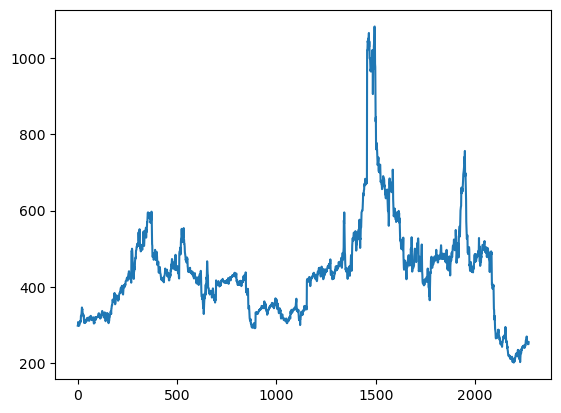

In [135]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [136]:
df1

0       298.5
1       300.2
2       308.0
3       307.0
4       304.4
        ...  
2265    250.0
2266    250.0
2267    250.0
2268    250.0
2269    255.0
Name: Close, Length: 2270, dtype: float64

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [138]:
print(df1)

[[0.10965909]
 [0.11159091]
 [0.12045455]
 ...
 [0.05454545]
 [0.05454545]
 [0.06022727]]


In [139]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [140]:
training_size,test_size

(1475, 795)

In [141]:
train_data

array([[0.10965909],
       [0.11159091],
       [0.12045455],
       ...,
       [0.8875    ],
       [0.86704545],
       [0.87272727]])

In [142]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [143]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [144]:
print(X_train.shape), print(y_train.shape)

(1374, 100)
(1374,)


(None, None)

In [145]:
print(X_test.shape), print(ytest.shape)

(694, 100)
(694,)


(None, None)

In [146]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [147]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [148]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [151]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 12s 346ms/step - loss: 0.0157 - val_loss: 0.0053
Epoch 2/100
22/22 [==============================] - 7s 319ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 3/100
22/22 [==============================] - 6s 294ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 4/100
22/22 [==============================] - 6s 262ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 5/100
22/22 [==============================] - 4s 181ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 6/100
22/22 [==============================] - 6s 260ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/100
22/22 [==============================] - 4s 201ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 8/100
22/22 [==============================] - 5s 215ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/100
22/22 [==============================] - 3s 141ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/100
22/22 [==============================] - 4s 162ms/step - loss: 0.0013 - val_l

Epoch 77/100
22/22 [==============================] - 7s 297ms/step - loss: 2.7768e-04 - val_loss: 3.5015e-04
Epoch 78/100
22/22 [==============================] - 5s 240ms/step - loss: 2.6202e-04 - val_loss: 3.1956e-04
Epoch 79/100
22/22 [==============================] - 5s 231ms/step - loss: 3.1350e-04 - val_loss: 3.1525e-04
Epoch 80/100
22/22 [==============================] - 6s 286ms/step - loss: 2.6068e-04 - val_loss: 2.9821e-04
Epoch 81/100
22/22 [==============================] - 7s 334ms/step - loss: 2.8550e-04 - val_loss: 3.8135e-04
Epoch 82/100
22/22 [==============================] - 7s 326ms/step - loss: 2.9891e-04 - val_loss: 5.5185e-04
Epoch 83/100
22/22 [==============================] - 7s 346ms/step - loss: 3.0985e-04 - val_loss: 4.3082e-04
Epoch 84/100
22/22 [==============================] - 6s 273ms/step - loss: 3.2018e-04 - val_loss: 3.4614e-04
Epoch 85/100
22/22 [==============================] - 7s 328ms/step - loss: 2.7455e-04 - val_loss: 3.2116e-04
Epoch 86/1

In [159]:
import tensorflow as tf

In [160]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 0s 21ms/step


In [161]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [162]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

437.99859702649184

In [164]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

455.0737287839201

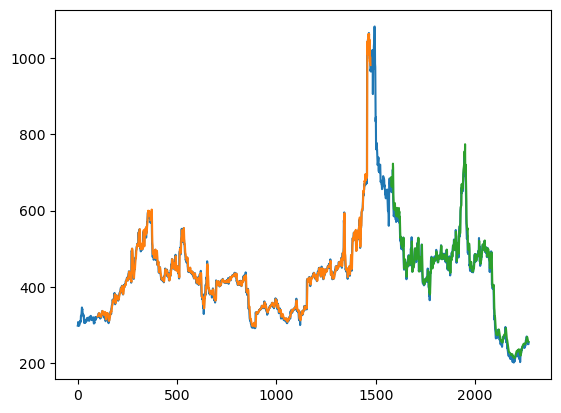

In [165]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [166]:
len(test_data),len(train_data)

(795, 1475)

In [167]:
x_input=test_data[695:].reshape(1,-1)
x_input.shape

(1, 100)

In [168]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [169]:
temp_input

[0.020454545454545475,
 0.020454545454545475,
 0.019318181818181818,
 0.020454545454545475,
 0.01477272727272727,
 0.018181818181818188,
 0.011363636363636381,
 0.011363636363636381,
 0.012500000000000011,
 0.010227272727272724,
 0.01477272727272727,
 0.01590909090909093,
 0.012500000000000011,
 0.011363636363636381,
 0.01590909090909093,
 0.017045454545454558,
 0.013636363636363641,
 0.0022727272727272874,
 0.0022727272727272874,
 0.0022727272727272874,
 0.009090909090909094,
 0.011363636363636381,
 0.0022727272727272874,
 0.0,
 0.0,
 0.0022727272727272874,
 0.0011363636363636576,
 0.004545454545454547,
 0.003409090909090917,
 0.004545454545454547,
 0.012500000000000011,
 0.012500000000000011,
 0.01477272727272727,
 0.020454545454545475,
 0.021590909090909077,
 0.026136363636363652,
 0.026136363636363652,
 0.026136363636363652,
 0.023863636363636392,
 0.027272727272727254,
 0.026136363636363652,
 0.026136363636363652,
 0.021590909090909077,
 0.018181818181818188,
 0.03409090909090909,

In [170]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.06253571]
101
1 day input [0.02045455 0.01931818 0.02045455 0.01477273 0.01818182 0.01136364
 0.01136364 0.0125     0.01022727 0.01477273 0.01590909 0.0125
 0.01136364 0.01590909 0.01704545 0.01363636 0.00227273 0.00227273
 0.00227273 0.00909091 0.01136364 0.00227273 0.         0.
 0.00227273 0.00113636 0.00454545 0.00340909 0.00454545 0.0125
 0.0125     0.01477273 0.02045455 0.02159091 0.02613636 0.02613636
 0.02613636 0.02386364 0.02727273 0.02613636 0.02613636 0.02159091
 0.01818182 0.03409091 0.0375     0.02386364 0.02272727 0.03409091
 0.03636364 0.02272727 0.02159091 0.01590909 0.00909091 0.01477273
 0.01477273 0.00113636 0.01022727 0.02159091 0.03181818 0.02840909
 0.02727273 0.03181818 0.04090909 0.0375     0.0375     0.04318182
 0.04659091 0.04431818 0.04431818 0.04886364 0.04886364 0.04772727
 0.05       0.04772727 0.04886364 0.05       0.04545455 0.04318182
 0.05       0.05113636 0.05227273 0.04886364 0.05454545 0.05795455
 0.06590909 0.06136364 0.06590909 0.07159091 0.07

11 day output [[0.08628651]]
12 day input [0.0125     0.01136364 0.01590909 0.01704545 0.01363636 0.00227273
 0.00227273 0.00227273 0.00909091 0.01136364 0.00227273 0.
 0.         0.00227273 0.00113636 0.00454545 0.00340909 0.00454545
 0.0125     0.0125     0.01477273 0.02045455 0.02159091 0.02613636
 0.02613636 0.02613636 0.02386364 0.02727273 0.02613636 0.02613636
 0.02159091 0.01818182 0.03409091 0.0375     0.02386364 0.02272727
 0.03409091 0.03636364 0.02272727 0.02159091 0.01590909 0.00909091
 0.01477273 0.01477273 0.00113636 0.01022727 0.02159091 0.03181818
 0.02840909 0.02727273 0.03181818 0.04090909 0.0375     0.0375
 0.04318182 0.04659091 0.04431818 0.04431818 0.04886364 0.04886364
 0.04772727 0.05       0.04772727 0.04886364 0.05       0.04545455
 0.04318182 0.05       0.05113636 0.05227273 0.04886364 0.05454545
 0.05795455 0.06590909 0.06136364 0.06590909 0.07159091 0.07727273
 0.06590909 0.06590909 0.06136364 0.05681818 0.05454545 0.05454545
 0.05454545 0.05454545 0.0545454

19 day output [[0.1013051]]
20 day input [0.00909091 0.01136364 0.00227273 0.         0.         0.00227273
 0.00113636 0.00454545 0.00340909 0.00454545 0.0125     0.0125
 0.01477273 0.02045455 0.02159091 0.02613636 0.02613636 0.02613636
 0.02386364 0.02727273 0.02613636 0.02613636 0.02159091 0.01818182
 0.03409091 0.0375     0.02386364 0.02272727 0.03409091 0.03636364
 0.02272727 0.02159091 0.01590909 0.00909091 0.01477273 0.01477273
 0.00113636 0.01022727 0.02159091 0.03181818 0.02840909 0.02727273
 0.03181818 0.04090909 0.0375     0.0375     0.04318182 0.04659091
 0.04431818 0.04431818 0.04886364 0.04886364 0.04772727 0.05
 0.04772727 0.04886364 0.05       0.04545455 0.04318182 0.05
 0.05113636 0.05227273 0.04886364 0.05454545 0.05795455 0.06590909
 0.06136364 0.06590909 0.07159091 0.07727273 0.06590909 0.06590909
 0.06136364 0.05681818 0.05454545 0.05454545 0.05454545 0.05454545
 0.05454545 0.06022727 0.06253571 0.06463711 0.06699273 0.06934302
 0.07162353 0.0738351  0.07599184 0.0

27 day output [[0.11416874]]
28 day input [0.00340909 0.00454545 0.0125     0.0125     0.01477273 0.02045455
 0.02159091 0.02613636 0.02613636 0.02613636 0.02386364 0.02727273
 0.02613636 0.02613636 0.02159091 0.01818182 0.03409091 0.0375
 0.02386364 0.02272727 0.03409091 0.03636364 0.02272727 0.02159091
 0.01590909 0.00909091 0.01477273 0.01477273 0.00113636 0.01022727
 0.02159091 0.03181818 0.02840909 0.02727273 0.03181818 0.04090909
 0.0375     0.0375     0.04318182 0.04659091 0.04431818 0.04431818
 0.04886364 0.04886364 0.04772727 0.05       0.04772727 0.04886364
 0.05       0.04545455 0.04318182 0.05       0.05113636 0.05227273
 0.04886364 0.05454545 0.05795455 0.06590909 0.06136364 0.06590909
 0.07159091 0.07727273 0.06590909 0.06590909 0.06136364 0.05681818
 0.05454545 0.05454545 0.05454545 0.05454545 0.05454545 0.06022727
 0.06253571 0.06463711 0.06699273 0.06934302 0.07162353 0.0738351
 0.07599184 0.07810679 0.08018933 0.08224532 0.08427756 0.08628651
 0.08827107 0.09022915 0.

In [171]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [172]:
import matplotlib.pyplot as plt

In [173]:
len(df1)

2270

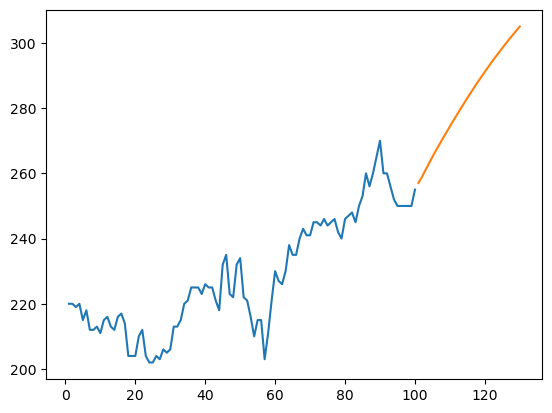

In [175]:
plt.plot(day_new,scaler.inverse_transform(df1[2170:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

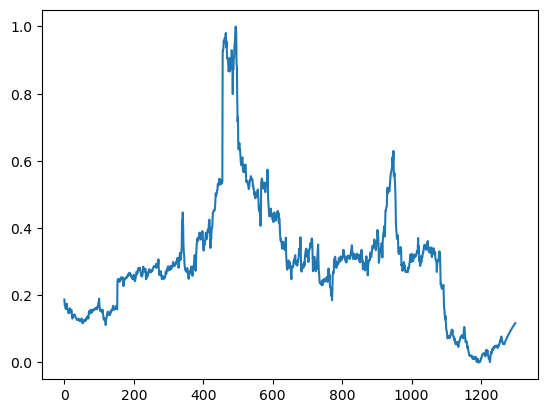

In [176]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [177]:
df3=scaler.inverse_transform(df3).tolist()

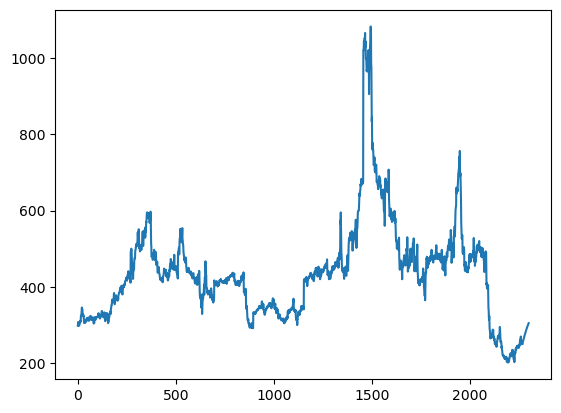

In [178]:
plt.plot(df3)

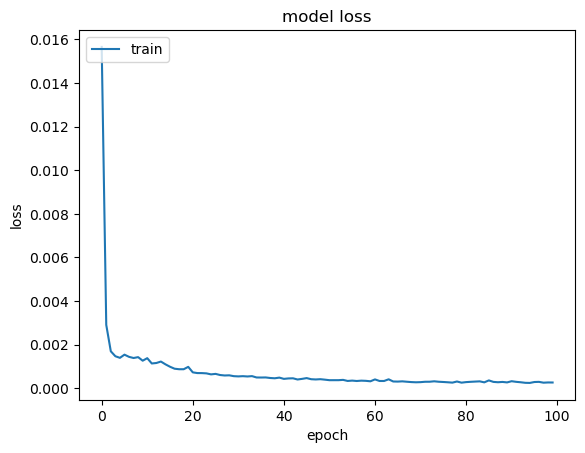

In [179]:
#to show the loss curve
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()